# 1.7.1 Camera Calibration

In [3]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [4]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [5]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)

In [6]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('.\Image\*.png') #('.\Image\*.png')

<>:4: SyntaxWarning: invalid escape sequence '\I'
<>:4: SyntaxWarning: invalid escape sequence '\I'
C:\Users\U308 - 27\AppData\Local\Temp\ipykernel_20308\3950415041.py:4: SyntaxWarning: invalid escape sequence '\I'
  images = glob.glob('.\Image\*.png') #('.\Image\*.png')


In [7]:
len(images)

26

In [8]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,7),None) #(7,6)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(7,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,7), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
cv2.imshow('img',img)

## Calibration

In [10]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [11]:
mtx

array([[953.49424829,   0.        , 621.9044511 ],
       [  0.        , 958.01326742, 383.48156976],
       [  0.        ,   0.        ,   1.        ]])

In [12]:
dist

array([[-0.00501472, -0.43462045,  0.00429258,  0.00433981,  0.86832958]])

In [13]:
print(rvecs)

(array([[0.00920579],
       [0.42790004],
       [3.08297995]]), array([[-0.2961266 ],
       [-0.22341697],
       [-0.01719997]]), array([[-0.28519344],
       [-0.52177035],
       [ 0.00690279]]), array([[0.05606892],
       [0.55614685],
       [1.56680538]]), array([[-0.2908461 ],
       [ 0.06476821],
       [ 0.02737928]]), array([[0.20257884],
       [0.0777109 ],
       [0.02765038]]), array([[-1.07546382],
       [ 0.05471046],
       [ 0.05359941]]), array([[-0.16811202],
       [ 0.33620656],
       [ 0.08133462]]), array([[-0.21738124],
       [ 0.05715586],
       [ 0.0351715 ]]), array([[0.41082434],
       [0.83236676],
       [1.50825947]]), array([[-0.21718772],
       [-0.28559941],
       [ 0.00119237]]), array([[-0.04960586],
       [-0.25390883],
       [-3.11849503]]), array([[-0.16238387],
       [ 0.03882412],
       [ 0.01762418]]), array([[-0.21823416],
       [ 0.08755807],
       [ 0.02531639]]), array([[0.268902  ],
       [0.01049129],
       [0.0301516

In [14]:
tvecs

(array([[ 2.66306604],
        [ 3.8635012 ],
        [20.83743048]]),
 array([[-5.56177997],
        [-1.45800878],
        [21.66379299]]),
 array([[-8.06114429],
        [-1.14282539],
        [20.69160888]]),
 array([[ 5.50813077],
        [-1.0253361 ],
        [20.36206459]]),
 array([[-3.30217667],
        [-1.19125556],
        [21.65637748]]),
 array([[-3.4795726 ],
        [-0.9252721 ],
        [18.96454469]]),
 array([[-3.13573181],
        [ 1.56917524],
        [21.53931304]]),
 array([[-1.90909616],
        [-1.42786678],
        [20.46050517]]),
 array([[-4.07137061],
        [-1.60645967],
        [20.18271679]]),
 array([[ 4.18852222],
        [-1.31732829],
        [18.13109198]]),
 array([[-5.18691276],
        [-1.86328957],
        [19.18646378]]),
 array([[ 2.07280397],
        [ 3.73663514],
        [18.77826682]]),
 array([[-3.88854407],
        [-2.15751998],
        [18.38982813]]),
 array([[-3.69297625],
        [-1.68802574],
        [23.27780354]]),
 array

## Undistortion

In [15]:
img = cv2.imread('./Image/image50.png')
h, w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

## 1. Using cv2.undistort()

In [16]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

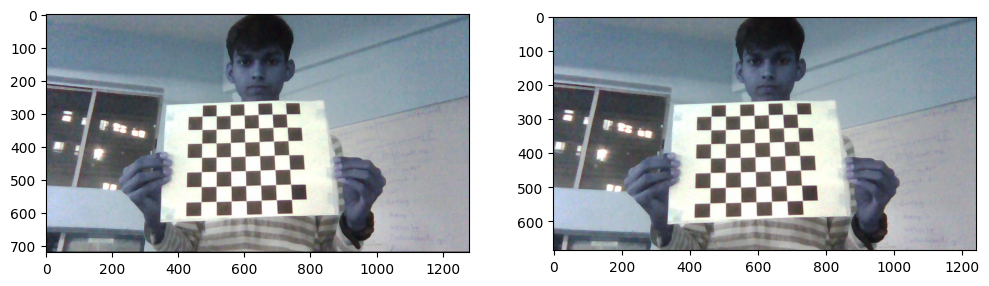

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## 2. Using remapping

In [18]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

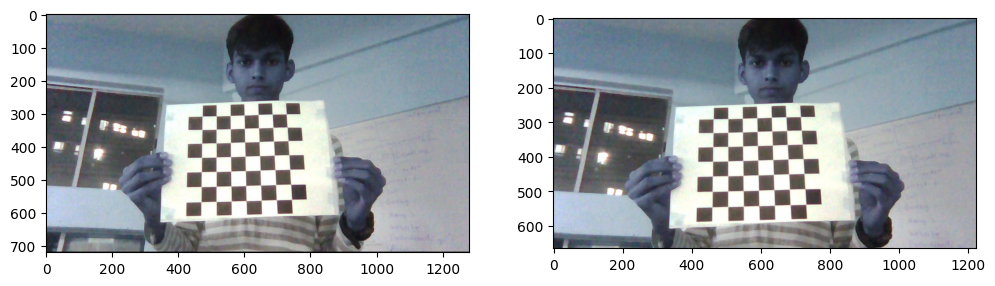

In [19]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## Re-projection Error

In [20]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error
print("mean error: ", tot_error/len(objpoints))

mean error:  0.11411633109994226
